# Load Python nessasary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
iris = pd.read_csv(r'.\iris.csv', index_col='Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- No missing values

In [4]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- The Data is Balanced

# Label Encoding - Convert Labeled Target Column to Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder
iris['Species'] = iris[['Species']].apply(LabelEncoder().fit_transform)

In [6]:
iris.Species.unique()

array([0, 1, 2])

# Visualization

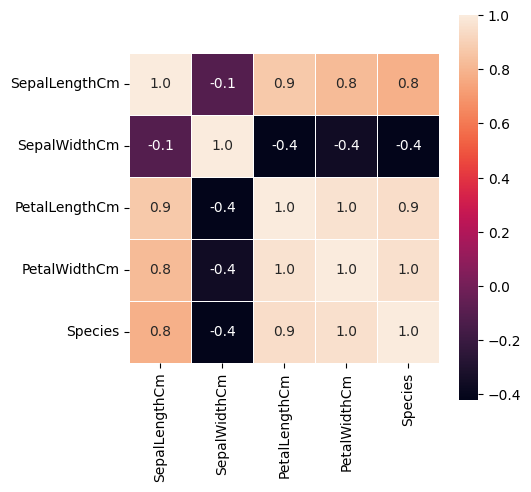

In [14]:
# Correlation of the Attributes
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(iris.corr(), annot=True, linewidths=.5, ax=ax, fmt=".1f", square=True)
plt.show()

- 'PetalLengthCm' & 'PetalWidthCm' have very high correlation with the target column. It might be all we need to perform classification

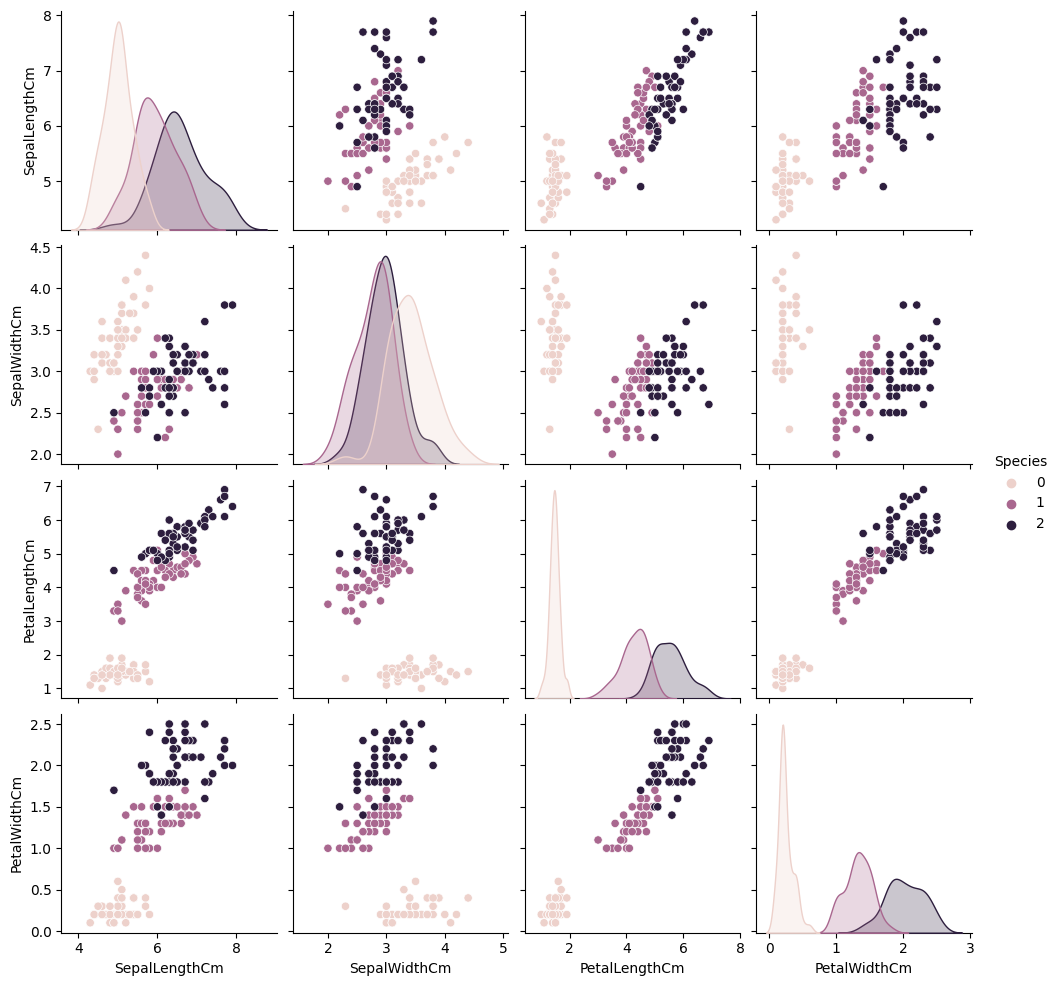

In [13]:
# Check Distribution
sns.pairplot(iris, hue='Species', diag_kind='kde')
plt.show()

All three attributes SepalLengthCm, PetalLengthCm, PetalWidth exhibit perfect linear separability, while 'SepalWidthCm' may not be as suitable for classification.

# Validation Dataset

In [8]:
# Perfoming Train and Test split
X = iris.drop('Species', axis=1)
y = iris.Species
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Decision Tree Classifier

In [9]:
# Train Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1) #(criterion='gini', max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
# The Graphical representation of the Tree.
from sklearn import tree
plt.figure(figsize=(200,100))
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()

## Predict

In [11]:
# Predict on validation set
y_pred = clf.predict(X_test)

In [12]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Conclusion

Achieving 98% accuracy is certainly beyond excellence! <br>
Of course, we always strive for more. That's why we can bring out the big guns and employ more sophisticated algorithms like RandomForest or XGBoost to really push the accuracy needle to the max. 🚀